### 크롤링 데이터 병합 & 전처리

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


data=[]
for i in range(1,13):
    data.append( pd.read_excel(f"/content/rank{i}.xlsx"))

df = pd.concat(data, ignore_index=True)

def need_int(x):
    try:
        return int(x.replace('\n원', '').replace(',', ''))
    except:
        return int(x.replace(',', ''))

df['정가']= df['정가'].apply(need_int)
df['할인가'] = df['할인가'].apply(need_int)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
###############제공된 코드 건드리지 마세요 ###################

### 데이터 컬럼별 없음(결측치) 개수 파악

col_name= df.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 4
별점 3
피부정보 5203
피부타입 183
피부고민 185
자극도 185


In [6]:
#피부정보, 별점, 피부타입, 피부고민, 자극도 중 하나라도 값이 '없음'인 경우
df[(df['피부타입']=='없음') | (df['별점']=='없음')|(df['피부정보']=='없음')|(df['피부고민']=='없음')|(df['자극도']=='없음')]

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
9,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,소심한고양이,5점만점에 4점,없음,복합성에 좋아요,진정에 좋아요,자극이 느껴져요
18,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,oHㄱl,5점만점에 5점,없음,건성에 좋아요,주름/미백에 좋아요,보통이에요
26,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,송송111,5점만점에 5점,없음,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
27,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,MiMi20,5점만점에 4점,없음,건성에 좋아요,진정에 좋아요,자극이 느껴져요
35,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,lovely,5점만점에 5점,없음,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
...,...,...,...,...,...,...,...,...,...,...,...
10975,아떼,아떼 바이탈 씨 좀 토닝 컨센트레이트 기획(20ml+10ml*2ea),에센스/세럼,45000,36000,찡징,5점만점에 3점,없음,복합성에 좋아요,진정에 좋아요,보통이에요
10976,아떼,아떼 바이탈 씨 좀 토닝 컨센트레이트 기획(20ml+10ml*2ea),에센스/세럼,45000,36000,코초트민,5점만점에 5점,없음,복합성에 좋아요,진정에 좋아요,보통이에요
10977,아떼,아떼 바이탈 씨 좀 토닝 컨센트레이트 기획(20ml+10ml*2ea),에센스/세럼,45000,36000,angelina****,5점만점에 5점,없음,복합성에 좋아요,주름/미백에 좋아요,자극이 느껴져요
10978,아떼,아떼 바이탈 씨 좀 토닝 컨센트레이트 기획(20ml+10ml*2ea),에센스/세럼,45000,36000,없음,없음,없음,없음,없음,없음


In [7]:
df2 = df.drop(index=df[(df['별점']=='없음')|(df['피부타입']=='없음')|(df['피부고민']=='없음')|(df['자극도']=='없음')].index)
df2.reset_index(drop=True, inplace=True)
df2.shape

(10792, 11)

In [8]:
###############제공된 코드 건드리지 마세요 ###################
### 데이터 컬럼별 없음(결측치) 개수 파악

col_name= df2.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df2[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 2
별점 0
피부정보 5145
피부타입 0
피부고민 0
자극도 0


In [9]:
df2.drop(columns = '아이디', inplace=True)

############################################

def split_type(x):
    try:
        return x.split(' ')[0]
    except:
        return np.NaN


def split_tone(x):
    try:
        return x.split(' ')[1]
    except:
        return np.NaN

def split_consider1(x):
    try:
        return x.split(' ')[2]
    except:
        return np.NaN

def split_consider2(x):
    try:
        return x.split(' ')[3]
    except:
        return np.NaN

df2["user피부타입"] = df2['피부정보'].apply(split_type)
df2["user피부톤"] = df2['피부정보'].apply(split_tone)
df2["user피부고민1"] = df2['피부정보'].apply(split_consider1)
df2["user피부고민2"] = df2['피부정보'].apply(split_consider2)

############################################

def to_nan(x):
    if x not in ['건성', '복합성', '지성', '민감성', '약건성', '중성', '트러블성']:
        return np.NaN
    else:
        return x


df2["user피부타입"] = df2['user피부타입'].apply(to_nan)

df2['user피부고민2']= df2['user피부고민2'].fillna(df2['user피부톤'])

def to_nan_피부고민2(x):
    if x in ['웜톤', '쿨톤', '여름쿨톤', '봄웜톤', '가을웜톤', '겨울쿨톤']:
        return np.NaN
    else:
        return x

df2["user피부고민2"] = df2['user피부고민2'].apply(to_nan_피부고민2)

df2.dropna(axis =0, inplace=True)
df2.isnull().sum()


브랜드          0
상품명          0
카테고리         0
정가           0
할인가          0
별점           0
피부정보         0
피부타입         0
피부고민         0
자극도          0
user피부타입     0
user피부톤      0
user피부고민1    0
user피부고민2    0
dtype: int64

In [10]:
df3=df2.copy()

#상품명 간소화
def name_min(x):
    if x == '[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획':
        return "goodal"
    elif x == '[8월 올영픽/1+1단독] 성분에디터 그린토마토 포어 리프팅 앰플 플러스 30ml 더블 기획':
        return 'tomato_ampoul'
    elif x== '[뽐니PICK/한정기획] 토리든 다이브인 세럼 50ml 리필 한정 기획(+50ml 리필팩+수딩 크림 20ml)':
        return 'torriden_serum'
    elif x== '[8월 올영픽/소의튜브 PICK] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)':
        return 'nature_aqua_cream'
    elif x == '[한정기획/1+1] 라운드랩 자작나무 수분 크림 80ml 1+1 기획 (+소나무 클렌저 10ml)':
        return 'roundrap_cream'
    elif x == '[8월올영픽/최모나PICK] 토리든 다이브인 저분자 히알루론산 수딩크림 더블기획 (100ml+100ml)':
        return 'torriden_cream'
    elif x == '아벤느 이드랑스 에센스 인 로션 200ml 기획 (+100ml 증정)':
        return 'avenue_lotion'
    elif x=='[8월 올영픽/리필기획] 아누아 어성초 77 수딩 토너 350ml 리필 기획세트(350ml+350ml리필)':
        return 'anua_toner'
    elif x== '[8월 올영픽]구달 청귤 비타C 잡티케어 크림 리필에디션 기획(75ml+75ml리필)':
        return 'goodal_cream'
    elif x== '[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트':
        return 'drg_cream'
    elif x=='[대용량] 파티온 노스카나인 트러블 세럼 단독 기획(50ml+15ml)':
        return 'partyon'
    elif x=='아떼 바이탈 씨 좀 토닝 컨센트레이트 기획(20ml+10ml*2ea)':
        return 'athe_toning'





df3["상품명"]=df3['상품명'].apply(name_min)

df3.drop(columns = ['브랜드', '피부정보', 'user피부톤'], inplace =True)

df3.rename(columns  ={'피부타입': '효과1', '피부고민':'효과2', 'user피부타입':'피부타입', 'user피부고민1':'피부고민1', 'user피부고민2':'피부고민2'}, inplace=True)

In [11]:
def 자극도인코딩(x):
    if x =='자극없이 순해요':
        return 0
    elif x == '보통이에요':
        return 1
    else:
        return 2



df3["자극도"]= df3['자극도'].apply(자극도인코딩)
df4 = pd.get_dummies(df3, columns = ['상품명', '카테고리', '효과1', '효과2', '피부고민1', '피부고민2', '피부타입'])
def stars(x):
    return int(x.split(' ')[1].replace('점', ''))

df4['별점']= df4['별점'].apply(stars)

In [12]:
df4.head()

,정가,할인가,별점,자극도,상품명_anua_toner,상품명_athe_toning,상품명_avenue_lotion,상품명_drg_cream,상품명_goodal,상품명_goodal_cream,...,피부고민2_트러블,피부고민2_피지과다,피부고민2_홍조,피부타입_건성,피부타입_민감성,피부타입_복합성,피부타입_약건성,피부타입_중성,피부타입_지성,피부타입_트러블성
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Random Forest

In [13]:
df4.columns

Index(['정가', '할인가', '별점', '자극도', '상품명_anua_toner', '상품명_athe_toning',
       '상품명_avenue_lotion', '상품명_drg_cream', '상품명_goodal', '상품명_goodal_cream',
       '상품명_nature_aqua_cream', '상품명_partyon', '상품명_roundrap_cream',
       '상품명_tomato_ampoul', '상품명_torriden_cream', '상품명_torriden_serum',
       '카테고리_스킨/토너', '카테고리_에센스/세럼', '카테고리_크림', '효과1_건성에 좋아요', '효과1_복합성에 좋아요',
       '효과1_지성에 좋아요', '효과2_보습에 좋아요', '효과2_주름/미백에 좋아요', '효과2_진정에 좋아요',
       '피부고민1_각질', '피부고민1_다크서클', '피부고민1_모공', '피부고민1_미백', '피부고민1_민감성',
       '피부고민1_블랙헤드', '피부고민1_아토피', '피부고민1_잡티', '피부고민1_주름', '피부고민1_탄력',
       '피부고민1_트러블', '피부고민1_피지과다', '피부고민1_홍조', '피부고민2_각질', '피부고민2_다크서클',
       '피부고민2_모공', '피부고민2_미백', '피부고민2_민감성', '피부고민2_블랙헤드', '피부고민2_아토피',
       '피부고민2_잡티', '피부고민2_주름', '피부고민2_탄력', '피부고민2_트러블', '피부고민2_피지과다',
       '피부고민2_홍조', '피부타입_건성', '피부타입_민감성', '피부타입_복합성', '피부타입_약건성', '피부타입_중성',
       '피부타입_지성', '피부타입_트러블성'],
      dtype='object')

<BarContainer object of 5 artists>

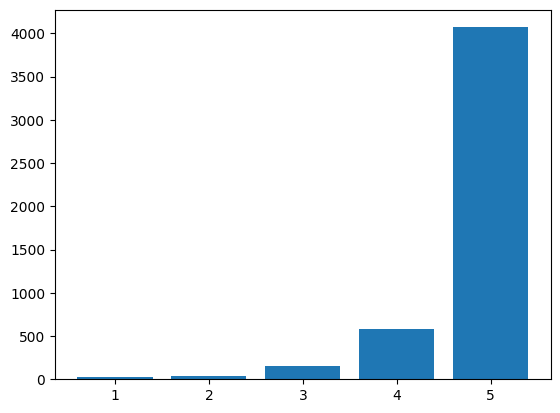

In [14]:
features= df4[['정가', '할인가', '자극도', '상품명_anua_toner', '상품명_athe_toning',
       '상품명_avenue_lotion', '상품명_drg_cream', '상품명_goodal', '상품명_goodal_cream',
       '상품명_nature_aqua_cream', '상품명_partyon', '상품명_roundrap_cream',
       '상품명_tomato_ampoul', '상품명_torriden_cream', '상품명_torriden_serum',
       '카테고리_스킨/토너', '카테고리_에센스/세럼', '카테고리_크림', '효과1_건성에 좋아요', '효과1_복합성에 좋아요',
       '효과1_지성에 좋아요', '효과2_보습에 좋아요', '효과2_주름/미백에 좋아요', '효과2_진정에 좋아요',
       '피부고민1_각질', '피부고민1_다크서클', '피부고민1_모공', '피부고민1_미백', '피부고민1_민감성',
       '피부고민1_블랙헤드', '피부고민1_아토피', '피부고민1_잡티', '피부고민1_주름', '피부고민1_탄력',
       '피부고민1_트러블', '피부고민1_피지과다', '피부고민1_홍조', '피부고민2_각질', '피부고민2_다크서클',
       '피부고민2_모공', '피부고민2_미백', '피부고민2_민감성', '피부고민2_블랙헤드', '피부고민2_아토피',
       '피부고민2_잡티', '피부고민2_주름', '피부고민2_탄력', '피부고민2_트러블', '피부고민2_피지과다',
       '피부고민2_홍조', '피부타입_건성', '피부타입_민감성', '피부타입_복합성', '피부타입_약건성', '피부타입_중성',
       '피부타입_지성', '피부타입_트러블성']]
target= df4['별점']

#test/train set 설정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 50)

#별점 분포 시각화
#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#막대그래프 코드 작성
plt.bar(df4['별점'].value_counts().index,df4['별점'].value_counts())

In [15]:
#불균형 데이터 오버샘플링 SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전 train 데이터셋 shape : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 train 데이터셋 shape :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 train 타겟 별점 분포',y_train_over.value_counts() )

SMOTE 적용 전 train 데이터셋 shape :  (3894, 57) (3894,)
SMOTE 적용 후 train 데이터셋 shape : (16260, 57) (16260,)
SMOTE 적용 후 train 타겟 별점 분포 5    3252
3    3252
4    3252
2    3252
1    3252
Name: 별점, dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train_over)
X_test_scaled=scaler.fit_transform(X_test)

### Randomforest - Grid Search

hyper parameter를 찾는데 시간이 걸려서 어느정도 범위를 좁힌 후 코드를 실행하였습니다. 만약 더 나은 파라미터 값을 발견하면 수정해주세요! (skeleton code에 best_score를 출력할 수 있도록 조금 수정하였습니다.)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#각 파라미터 값 넣기
params = { 'n_estimators' : [70,75,80,85,90],
           'max_depth' : [15,17,20,23,25],
           'max_features': [10,15,20,25,30],
           'min_samples_split': [18,20,22]
            }


rfc = RandomForestClassifier(random_state=100, n_jobs=-1)
grid_cv = GridSearchCV(rfc, param_grid=params, cv=3, n_jobs = -1)     # cv는 교차 검증을 위해 분할되는 학습 데이터의 세트 수
grid_cv.fit(X_train_scaled, y_train_over)

print(f'최적 파라미터: {grid_cv.best_params_} 최고 평균 정확도: {grid_cv.best_score_}')

최적 파라미터: {'max_depth': 25, 'max_features': 10, 'min_samples_split': 18, 'n_estimators': 85} 최고 평균 정확도: 0.9051045510455106


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=25, max_features= 10, min_samples_split= 18, n_estimators=85)
rfc.fit(X_train_scaled, y_train_over)


from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


def _metrics(y_test, pred):
    acc= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred, average='micro')
    recall= recall_score(y_test, pred, average='micro')
    f1= f1_score(y_test, pred, average='micro')

    dict_metrics={'accuracy': [acc], 'precision':[precision],
                  'recall':[recall], 'f1':[f1]}
    df_metrics=pd.DataFrame(dict_metrics)

    return df_metrics

# max_depth=15, max_features= 13, min_samples_split= 20, n_estimators=90
pred = rfc.predict(X_test_scaled)

_metrics(y_test,pred)

,accuracy,precision,recall,f1
0,0.672485,0.672485,0.672485,0.672485


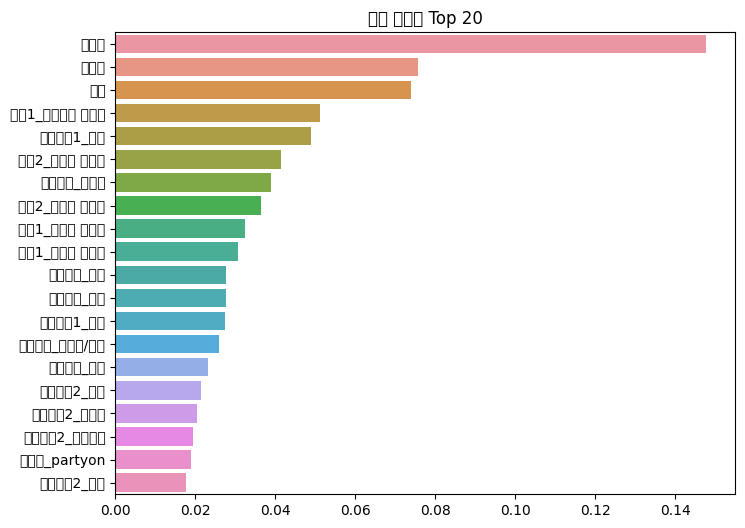

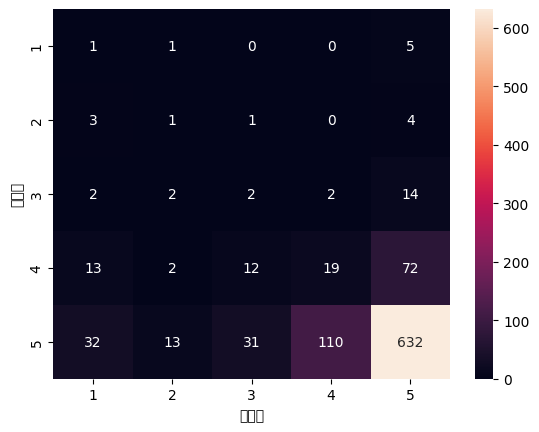

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#제공 코드
feat_importance = pd.Series(rfc.feature_importances_, index=features.columns)

top20 = feat_importance.sort_values(ascending=False)[:20]

#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


plt.figure(figsize=(8,6))
plt.title('피처 중요도 Top 20')
sns.barplot(x=top20.values, y=top20.index)
plt.show()

############ confusion matrix ######################

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, pred)
cf_matrix= pd.DataFrame(cf, index= [1,2,3,4,5], columns= [1,2,3,4,5])

#히트맵 코드 작성
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

## knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#train/test 데이터 분리 8:2로

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 50)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train_over)
X_test_scaled=scaler.fit_transform(X_test)

### KNN- grid search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#각 파라미터 값 넣기
knn_params = {
    'n_neighbors' : list(range(2,30)),
    'weights' : ['distance', 'uniform']
}


knn=KNeighborsClassifier(n_jobs=-1)

grid_cv=GridSearchCV(cv=5, n_jobs=-1, param_grid=knn_params, estimator=knn)
grid_cv.fit(X_train_scaled,y_train_over)


print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}, 최고 평균 정확도: {grid_cv.best_score_}')

최적 하이퍼 파라미터: {'n_neighbors': 6, 'weights': 'distance'}, 최고 평균 정확도: 0.9058425584255844


In [27]:
knn = KNeighborsClassifier(n_neighbors = 6, weights='distance', n_jobs=-1)
knn.fit(X_train_scaled,y_train_over)

knn_pred = knn.predict(X_test_scaled)

_metrics(y_test,knn_pred)

,accuracy,precision,recall,f1
0,0.524641,0.524641,0.524641,0.524641


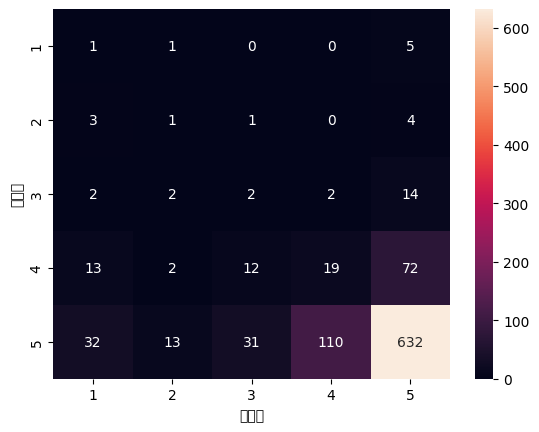

In [ ]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_test, pred)

knn_cf_matrix= pd.DataFrame(knn_cf, index= [1,2,3,4,5], columns= [1,2,3,4,5])

#히트맵 코드 작성

sns.heatmap(knn_cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()
